### Integración de datos "experimentales"
by Martina García Mejía

#### Importando librerías y datos

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import curve_fit

In [3]:
'''La lectura de datos se hace localmente y en el mismo directorio en el que se encuentra el notebook, con el nombre original del archivo.'''

data = np.genfromtxt("accel.txt", delimiter=' ', missing_values=np.nan)
t, a = data[:,0], data[:,1]

#### Lo interesante

Primero integremos numéricamente los datos de aceleración y velocidad usando el método del trapezoide.

In [4]:
v = cumulative_trapezoid(a,t, initial=0)
x = cumulative_trapezoid(v,t, initial=0)

Seleccionemos el rango de datos donde la aceleración es aproximadamente constante y hagamos un ajuste de la posición en función del tiempo, incluyendo errores.

In [5]:
#   Rango donde la aceleración es semiconstante y sublistas en este rango
cons_rg = (t > 1.0) & (t < 1.9)
t_cons, a_cons, v_cons, x_cons = t[cons_rg], a[cons_rg], v[cons_rg], x[cons_rg]

#   Regresión cuadrática
def pos(t,xo,vo,a):
    return xo+vo*t+a*(t**2)/2

x_param, x_coparam = curve_fit(pos, t_cons, x_cons)   # Cálculo de parámetros del ajuste
x_err = np.sqrt(np.diag(x_coparam))   # Errores estándar

Ahora sí, graficando:

Text(0.5, 1.0, 'Posición')

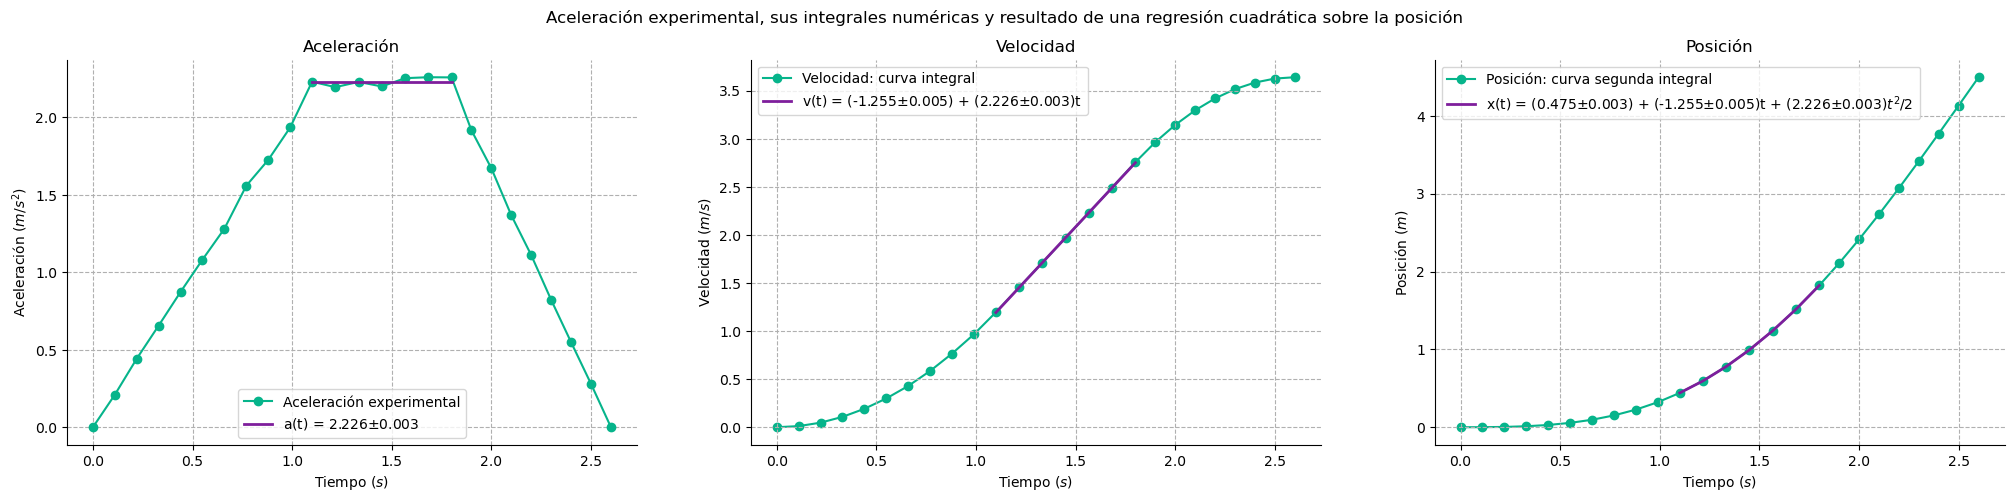

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))
fig.suptitle('Aceleración experimental, sus integrales numéricas y resultado de una regresión cuadrática sobre la posición')

ax1.plot(t,a, marker='o', color='xkcd:green blue', label='Aceleración experimental', zorder=2)
ax1.plot([min(t_cons), max(t_cons)],[x_param[2], x_param[2]], color="xkcd:purple", linewidth=2, zorder=2, 
         label=f'a(t) = {x_param[2]:.3f}$\pm${x_err[2]:.3f}')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(ls='--', zorder=0)
ax1.set_ylabel('Aceleración ($m/s^2$)')
ax1.set_xlabel('Tiempo ($s$)')
ax1.legend()
ax1.set_title('Aceleración')

ax2.plot(t,v, marker='o', color='xkcd:green blue', label='Velocidad: curva integral', zorder=1)
ax2.plot(t_cons,x_param[2]*t_cons+x_param[1], color="xkcd:purple", linewidth=2, zorder=2, 
         label=f'v(t) = ({x_param[1]:.3f}$\pm${x_err[1]:.3f}) + ({x_param[2]:.3f}$\pm${x_err[2]:.3f})t')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(ls='--', zorder=0)
ax2.set_ylabel('Velocidad ($m/s$)')
ax2.set_xlabel('Tiempo ($s$)')
ax2.legend()
ax2.set_title('Velocidad')

ax3.plot(t,x, marker='o', color='xkcd:green blue', label='Posición: curva segunda integral', zorder=1)
ax3.plot(t_cons,pos(t_cons, *x_param), color="xkcd:purple", linewidth=2, zorder=2,
         label=f'x(t) = ({x_param[0]:.3f}$\pm${x_err[0]:.3f}) + ({x_param[1]:.3f}$\pm${x_err[1]:.3f})t + ({x_param[2]:.3f}$\pm${x_err[2]:.3f})$t^{2}/2$ ')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(ls='--', zorder=0)
ax3.set_ylabel('Posición ($m$)')
ax3.set_xlabel('Tiempo ($s$)')
ax3.legend()
ax3.set_title('Posición')
